In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from volatility_arb import regime_indicator

## Implied Vol

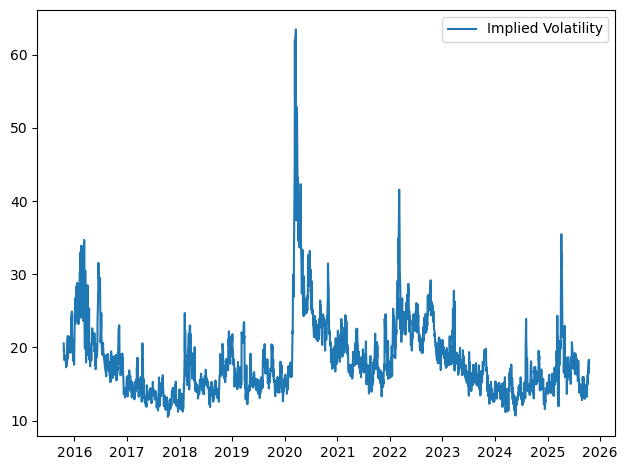

In [4]:
ind_rets = pd.read_csv("OMXS30_rets_vol.csv", header=0, index_col=0, parse_dates=True).dropna()
implied_vol = ind_rets['OMXS30_IV']

fig, ax = plt.subplots()
ax.plot(implied_vol, label="Implied Volatility")
ax.legend()
fig.tight_layout()
plt.show()

## Regime Testing

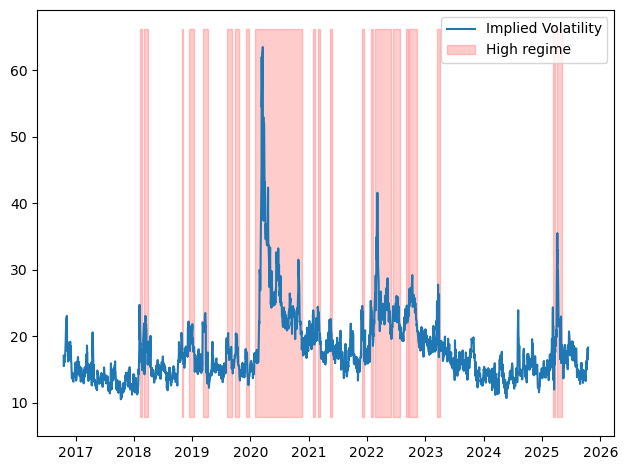

In [6]:
regime = regime_indicator(implied_vol, 
                            hi_percentile=75, 
                            smooth_window=10, 
                            threshold=0.25
                           ).dropna()
start = regime.index[0]
imp_vol = implied_vol[start:]

fig, ax = plt.subplots()
ax.plot(imp_vol, label="Implied Volatility")
ymin, ymax = ax.get_ylim()
ax.fill_between(imp_vol.index, ymin, ymax, where=(regime==0), color="r", alpha=0.2, label="High regime")
ax.legend()
fig.tight_layout()
plt.show()